# **Introduction**
This project explores the factors influencing global happiness by analyzing the relationships between happiness scores and key socio-economic indicators such as GDP per capita, social support, life expectancy, freedom, generosity, and perceptions of corruption. Using data from the World Happiness Report 2024, we perform an exploratory data analysis (EDA) and correlation study to identify patterns that can provide insights into the determinants of happiness. Python libraries such as pandas, seaborn, and plotly are utilized for data analysis and visualization.

**Data Source**
For this analysis, I downloaded the World Happiness Report dataset from Kaggle. The dataset provides insights into the happiness levels of various countries, along with several factors that contribute to these levels. The data includes variables such as GDP per capita, social support, life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

You can access the dataset directly from Kaggle

**Loading the Data**
To begin our analysis, I will perform Exploratory Data Analysis (EDA) to uncover trends, correlations, and insights related to happiness across different countries. First, we need to load the dataset into our Python environment and import the necessary libraries. Below is the code used to load the data using the Pandas library, along with NumPy and Seaborn for data manipulation and visualization:

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Install necessary libraries (if not already installed)
!pip install pandas numpy seaborn matplotlib

# Upload the CSV file
uploaded = files.upload()

# Get the name of the uploaded file
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Load the dataset from the CSV file
data = pd.read_csv(file_name)  # Use the uploaded file name

# Set display options to show all columns
pd.set_option('display.max_columns', None)  # None means no limit on the number of columns displayed

data.head()



Saving WHR2024.csv to WHR2024.csv


,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [3]:

# Display all column names in the dataset
data.columns.tolist()  # This will display the column names as a list

['Country name',
 'Ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [4]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Display the number of rows and columns
(num_rows, num_columns)

(143, 11)

In [5]:
# Get the data types of each column
data_types = data.dtypes

# Display the data types
data_types

,0
Country name,object
Ladder score,float64
upperwhisker,float64
lowerwhisker,float64
Explained by: Log GDP per capita,float64
Explained by: Social support,float64
Explained by: Healthy life expectancy,float64
Explained by: Freedom to make life choices,float64
Explained by: Generosity,float64
Explained by: Perceptions of corruption,float64


In [6]:
# Check if there are any missing values
data.isnull().sum()


,0
Country name,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Explained by: Log GDP per capita,3
Explained by: Social support,3
Explained by: Healthy life expectancy,3
Explained by: Freedom to make life choices,3
Explained by: Generosity,3
Explained by: Perceptions of corruption,3


In [7]:
# Get a boolean Series indicating rows with any missing values
missing_mask = data.isnull().any(axis=1)

# Display the rows where the condition is True (i.e., rows with missing values)
rows_with_missing_values = data[missing_mask]

"""data.isnull().any(axis=1): This creates a boolean Series where each entry
is True if the corresponding row has at least one missing value.
data[missing_mask]: This filters the DataFrame to include only the rows where the mask is True
"""
# Show the result
rows_with_missing_values

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,Bahrain,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows that contain any null values
new_data = data.dropna(axis=0)

# Display the cleaned DataFrame
new_data

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [16]:
# Rename specific columns to begin with uppercase
new_data.rename(columns={
    'upperwhisker': 'Upperwhisker',
    'lowerwhisker': 'Lowerwhisker'
}, inplace=True)

# Remove the prefix "Explained by: " from relevant column names
new_data.columns = data.columns.str.replace('Explained by: ', '', regex=False)

# Display the updated column names to verify changes
new_data.columns

# Display the updated DataFrame to verify the change
new_data.head()

<ipython-input-16-2d2684881231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns={


,Country name,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [17]:
# Rename the column 'Ladder score' to 'Happiness score'
new_data.rename(columns={'Ladder score': 'Happiness score'}, inplace=True)

# Display the updated DataFrame to verify the change
new_data.head()  # This will show the first few rows of the DataFrame

<ipython-input-17-ada3f9ccd375>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns={'Ladder score': 'Happiness score'}, inplace=True)


,Country name,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


**Transition to Analysis**


As we delve deeper into our exploration of the dataset, it's time to shift our focus from initial observations to a more detailed analysis. In this section, we will employ various visualization techniques and analytical methods to uncover patterns, trends, and insights that lie within the data.

We will begin by examining the distribution of key variables, such as the Happiness score, through histograms. This will allow us to understand the underlying frequency of different values and identify any potential outliers. Following this, we will utilize boxplots to provide a visual summary of the central tendency and variability of our numerical data, highlighting any significant deviations that may warrant further investigation.

Next, we will conduct Country Comparisons to analyze happiness scores across different nations, identifying which countries rank highest and lowest. This analysis will help us highlight regional trends and cultural factors influencing happiness.

We will also perform a Regional Analysis to examine happiness trends within specific regions, such as Europe, Asia, and Africa. This will help us understand both the commonalities and differences in happiness levels across diverse geographical areas.

Finally, we will conduct Correlation Studies, investigating the relationships between happiness scores and various factors such as Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and Perceptions of corruption. To visualize these relationships, we will use heatmaps, enabling us to identify significant associations that could inform our understanding of the data.


In [18]:
# Display the summary statistics
new_data.describe()


,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,5.644057,5.417700,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.181247,1.165108,1.198051,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.631750,4.762250,4.503750,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.800500,5.911000,5.676500,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.426250,6.515250,6.338250,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


**Histogram:** The first subplot is a histogram of the "Happiness score" variable, showing the distribution of values.


**Boxplot:** The second subplot is a boxplot of the "Happiness score," providing a visual summary of the central tendency and variability.

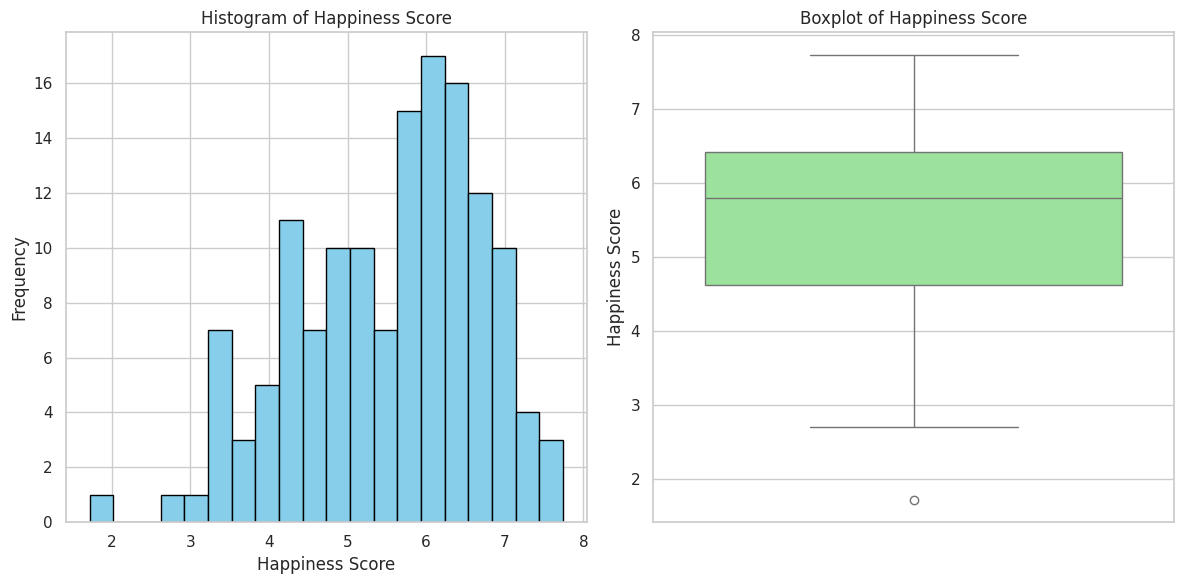

In [19]:
# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histogram for Happiness Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(new_data['Happiness score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# 2. Boxplot for Happiness Score
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=new_data['Happiness score'], color='lightgreen')
plt.title('Boxplot of Happiness Score')
plt.ylabel('Happiness Score')

# Show the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()


**Histogram of Happiness Score (Left Plot):**

The histogram shows the frequency distribution of happiness scores. The data appears to be approximately normally distributed, with a peak around scores of 5.5 to 6.5. There is some skewness towards the lower end (left side), indicating a few countries with lower happiness scores. The majority of countries have happiness scores between 4 and 7.

**Boxplot of Happiness Score (Right Plot):**

The boxplot provides a summary of the distribution, showing the median around 5.8 to 6. The interquartile range (IQR) spans from approximately 4.5 to 6.5. There is an outlier below 3, suggesting one or more countries with significantly lower happiness scores compared to others. The whiskers extend from around 2.5 to 8, indicating the overall range of scores.

**Country Comparison**

Sorting the Data: The DataFrame is sorted by the Happiness score in descending order to make it easier to visualize which countries have the highest and lowest scores.

Bar Plot: A horizontal bar plot is created using Seaborn's barplot() function, where the x-axis represents the Happiness score and the y-axis represents the Country name.

<ipython-input-20-2968561d3146>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Happiness score', y='Country name', data=sorted_data, palette='viridis')


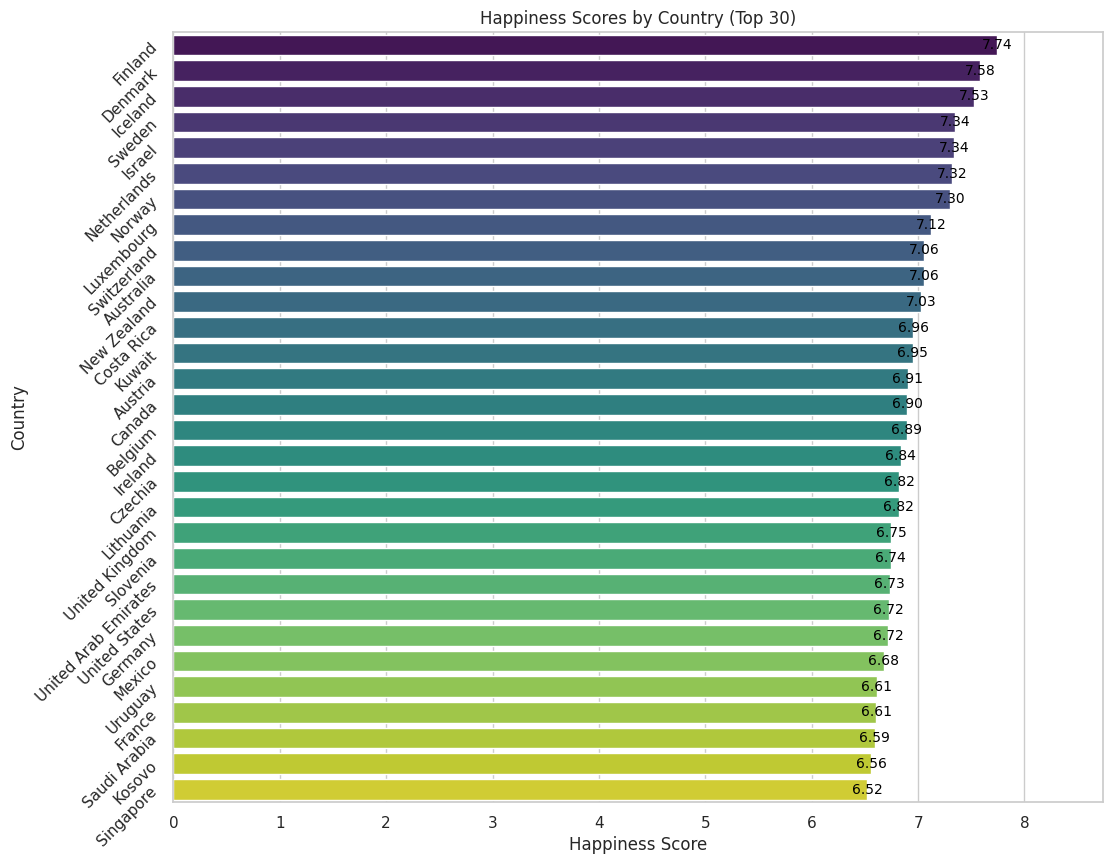

In [20]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Sort the DataFrame by Happiness Score to identify highest and lowest
sorted_data = new_data.sort_values(by='Happiness score', ascending=False)

# Limit to top 30 countries
#This code will create a bar plot displaying the happiness scores for the top 30 countries
top_n = 30
sorted_data = sorted_data.head(top_n)

# Create a bar plot for Happiness Scores by Country
plt.figure(figsize=(12, 10))  # Increase figure height for better readability
bar_plot = sns.barplot(x='Happiness score', y='Country name', data=sorted_data, palette='viridis')

# Rotate y-axis labels for better readability
plt.yticks(rotation=45, ha='right')

plt.title('Happiness Scores by Country (Top 30)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

# Add data labels to the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center', color='black', fontsize=10)

# Adjust x-axis limit for better visibility
plt.xlim(0, sorted_data['Happiness score'].max() + 1)

# Save the plot as an image file
plt.savefig('happiness_scores_by_country_top_30.png', bbox_inches='tight')

# Show the plot
plt.show()

In [23]:
# Convert country names to lowercase for consistency
data['Country name'] = new_data['Country name'].str.lower()

# Get the top 5 highest happiness scores
top_5_highest = new_data[['Country name', 'Happiness score']].nlargest(5, 'Happiness score')

# Get the top 5 lowest happiness scores
top_5_lowest = new_data[['Country name', 'Happiness score']].nsmallest(5, 'Happiness score')

# Display the results
print("Top 5 Countries with Highest Happiness Score:")
print(top_5_highest)

print("\nTop 5 Countries with Lowest Happiness Score:")
print(top_5_lowest)

Top 5 Countries with Highest Happiness Score:
  Country name  Happiness score
0      Finland            7.741
1      Denmark            7.583
2      Iceland            7.525
3       Sweden            7.344
4       Israel            7.341

Top 5 Countries with Lowest Happiness Score:
         Country name  Happiness score
142       Afghanistan            1.721
141           Lebanon            2.707
140           Lesotho            3.186
139      Sierra Leone            3.245
138  Congo (Kinshasa)            3.295


**Summary of What the Following Code Does:**
Loads the world happiness dataset and standardizes column names.
Loads Plotly's world dataset and renames columns to match the happiness data.
Standardizes country names to lowercase to prevent mismatches.
Merges the two datasets to incorporate happiness scores into the world data.
Handles missing values by replacing them with "No Data".
Creates and customizes an interactive world map to visualize the happiness scores.

In [26]:
import pandas as pd
import plotly.express as px

# Load the happiness dataset
data = pd.read_csv("WHR2024.csv")

# Standardizing the column name to match your update
data.rename(columns={'Ladder score': 'Happiness Score'}, inplace=True)

# Load Plotly's world dataset
world_data = px.data.gapminder().query("year == 2007")[['country', 'continent']]

# Rename column to match the dataset
world_data.rename(columns={'country': 'Country name'}, inplace=True)

# Standardize country names for merging
world_data['Country name'] = world_data['Country name'].str.lower()
data['Country name'] = data['Country name'].str.lower()

# Merge happiness data with world data while keeping all countries
merged_data = world_data.merge(data, on='Country name', how='left')

# Fill missing happiness scores with 'No Data'
merged_data['Happiness Score'].fillna('No Data', inplace=True)

# Plot the map with all countries and highlight only the ones in the happiness dataset
fig = px.choropleth(
    merged_data,
    locations='Country name',
    locationmode='country names',
    color='Happiness Score',
    hover_name='Country name',
    title="World Happiness Score Distribution",
    color_continuous_scale='Viridis'
)

# Customize map layout
fig.update_layout(geo=dict(showcoastlines=True))

# Display the map
fig.show()

<ipython-input-26-9224a02e5d76>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Happiness Score'].fillna('No Data', inplace=True)
<ipython-input-26-9224a02e5d76>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_data['Happiness Score'].fillna('No Data', inplace=True)


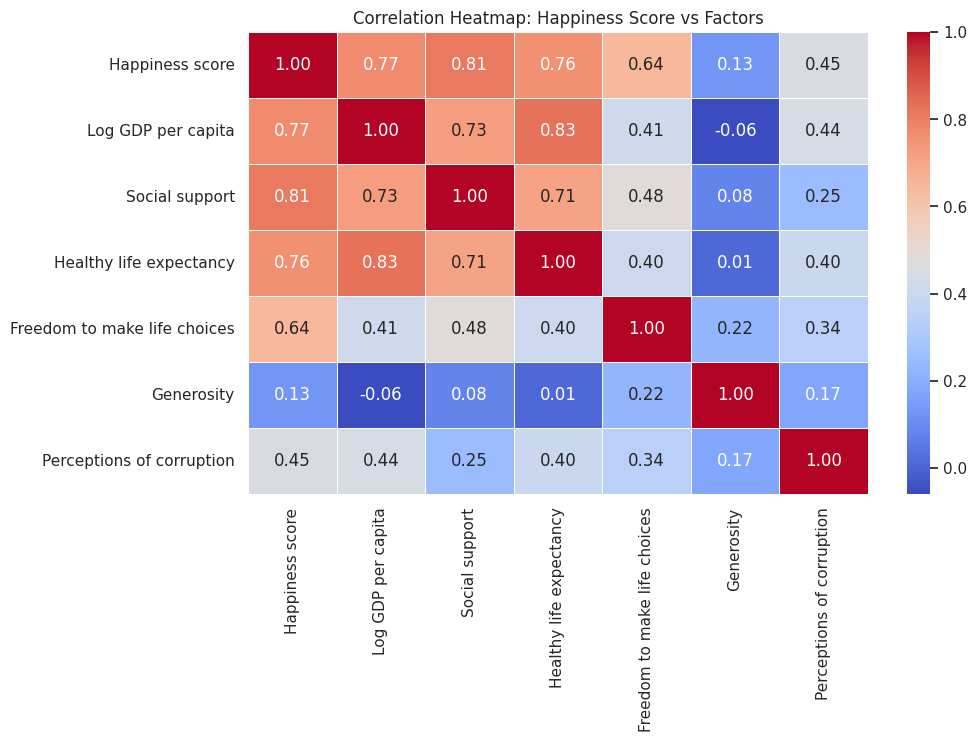

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation analysis
correlation_columns = [
    'Happiness score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Create a correlation matrix
correlation_matrix = new_data[correlation_columns].corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Happiness Score vs Factors')
plt.show()


## Key Observations:
**Strong Positive Correlations:**

Social Support (0.81): The highest correlation with the Happiness Score. This suggests that countries with stronger social support systems tend to have higher happiness levels.
Log GDP per Capita (0.77): A high correlation indicates that economic prosperity contributes significantly to overall happiness.
Healthy Life Expectancy (0.76): People in countries with better healthcare systems and longer life expectancy tend to report higher happiness levels.

**Moderate Positive Correlations:**

Freedom to Make Life Choices (0.64): There is a moderate correlation between personal freedom and happiness, implying that societies that allow greater personal choices tend to have happier populations.
Perceptions of Corruption (0.45): Although the correlation is not as strong, it still indicates that countries with lower corruption perception are likely to report higher happiness scores.

**Weak Positive Correlations:**

Generosity (0.13): This factor has the weakest correlation with happiness. It suggests that generosity alone does not strongly impact happiness, possibly because economic and social factors are more influential.


# **Relationships Between Independent Factors:**

**GDP and Health (0.83):** A strong relationship between GDP and life expectancy suggests that wealthier nations typically have better healthcare systems.

**Freedom and GDP (0.41):** Countries with higher GDP tend to have more freedom, but the correlation is not very strong.

**Corruption Perception and GDP (0.44):** Wealthier countries tend to perceive lower levels of corruption, but this relationship is also moderate.